# Convolutonal Neural Network Using pretrained model

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [2]:
conv_base = VGG16(include_top = False, weights='imagenet' , input_shape = (150,150,3))   # shape of imageNet

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
Base_dir = "C:/Users/Dell/Desktop/pac/Quater 3/Practice/data_directories"
train_dir = os.path.join(Base_dir,'train')
test_dir = os.path.join(Base_dir,"test")
Validation_dir = os.path.join(Base_dir,"val")

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [6]:
def feature_extraction(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape = (sample_count))
    data_generator = datagen.flow_from_directory(directory,target_size=(150,150),batch_size = batch_size , class_mode = "binary")
    i = 0
    for input_batch, label_batch in data_generator:
        features_batch = conv_base.predict(input_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = label_batch
        i += 1
        if i* batch_size >=sample_count:
            break
        
    return features, labels
    

In [7]:
train_feature,train_labels = feature_extraction(train_dir , 2000)
test_feature,test_labels = feature_extraction(test_dir , 1000)
Validation_feature,Validation_labels = feature_extraction(Validation_dir , 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_feature = np.reshape(train_feature , (2000,4*4*512))
test_feature = np.reshape(test_feature , (1000,4*4*512))
Validation_feature = np.reshape(Validation_feature , (1000,4*4*512))

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Dense(512, activation='relu' , input_shape = (4*4*512,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss = "binary_crossentropy" , optimizer = "rmsprop" , metrics=["acc"])

In [17]:
history = model.fit(train_feature,train_labels, epochs=5, validation_data= (Validation_feature,Validation_labels))  

# to compare accuracy with try 5 without pretrainedv model we will keep it similar 

Train on 2000 samples, validate on 1000 samples
Epoch 1/5
2000/2000 [==============================] - 9s 4ms/sample - loss: 1.2615 - acc: 0.7330 - val_loss: 0.8222 - val_acc: 0.7360
Epoch 2/5
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.4615 - acc: 0.8215 - val_loss: 0.2606 - val_acc: 0.8960
Epoch 3/5
2000/2000 [==============================] - 7s 3ms/sample - loss: 0.3210 - acc: 0.8840 - val_loss: 0.2759 - val_acc: 0.8950
Epoch 4/5
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.2716 - acc: 0.8915 - val_loss: 0.2460 - val_acc: 0.9010
Epoch 5/5
2000/2000 [==============================] - 6s 3ms/sample - loss: 0.2390 - acc: 0.9085 - val_loss: 0.2471 - val_acc: 0.8990


In [18]:
model.evaluate(test_feature,test_labels)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2864088351726532, 0.878]

In [19]:
#   acurracy increased from 33.4% to 87%


#   The accuracy does not increased that much because we use imagenet for humman  we should use facenet instead

<Figure size 432x288 with 0 Axes>

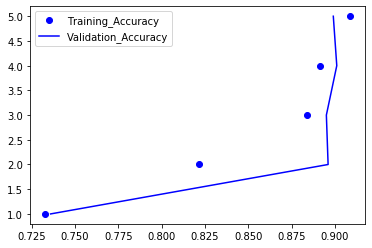

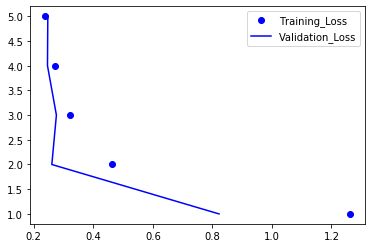

<Figure size 432x288 with 0 Axes>

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

from matplotlib import pyplot as plt

plt.plot(acc , epochs , "bo" , label = "Training_Accuracy")
plt.plot(val_acc , epochs , "b" , label = "Validation_Accuracy")
plt.legend()
plt.figure()
plt.plot(loss , epochs , "bo" , label = "Training_Loss")
plt.plot(val_loss , epochs , "b" , label = "Validation_Loss")
plt.legend()
plt.figure()